# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import statsmodels 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# set the all the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df = pd.read_excel('GermanCredit.xlsx')

df.head()
# Data set has been created. 

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [4]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [5]:
# there is no null value present in the dataset.

# 2. Check how many records do we have


In [6]:
print("Shape of the dataset: - ",df.shape,"\n")

Shape of the dataset: -  (1000, 3) 



In [7]:
# dataset has 1000 rows of data entries.

# 3. Plot Histogram for column 'CreditAmount'

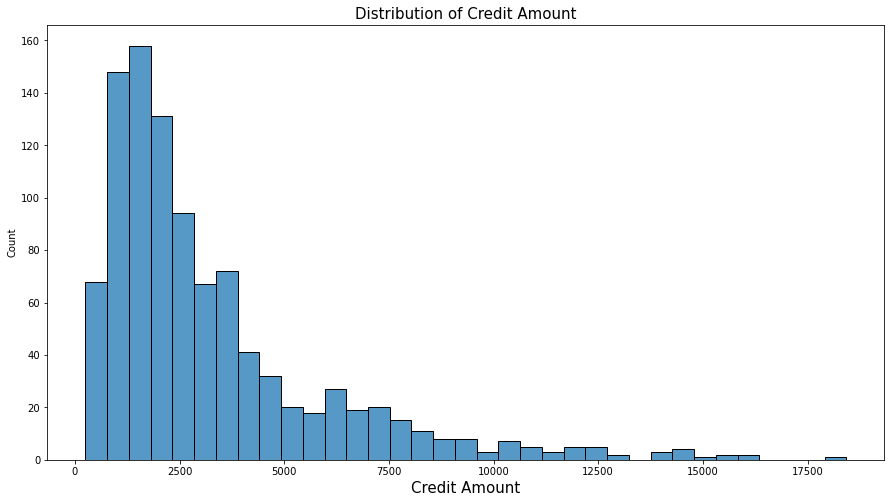

In [8]:

sns.histplot(df['CreditAmount'])

plt.title("Distribution of Credit Amount",fontsize=15)
plt.xlabel("Credit Amount",fontsize=15)
plt.show()

In [9]:
# CreditAmount is not normally distributed. It is  highly right skewed. 

# 3b. Create creditability dataframe

In [10]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amountIntervals =np.array([(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)])
print(amountIntervals)

[[    0   500]
 [  501  1000]
 [ 1001  1500]
 [ 1501  2000]
 [ 2001  2500]
 [ 2501  5000]
 [ 5001  7500]
 [ 7501 10000]
 [10001 15000]
 [15001 20000]]


In [11]:
# 

In [12]:
amountIntervalsDf = pd.DataFrame(amountIntervals, columns = ['intervalLeftSide', 'intervalRightSide'])
amountIntervalsDf

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [13]:
# making a dataframe of amount interval.

In [14]:
#Credibility table preparation for the datafrem
Credibility0 = []
Credibility1 = []
for i in amountIntervals:
    subData = df[df.CreditAmount >= i[0]]
    subData = subData[subData.CreditAmount <= i[1]]
    Credibility0.append(sum(subData.Creditability == 0))
    Credibility1.append(sum(subData.Creditability == 1))

In [15]:
temp_df = pd.DataFrame(np.column_stack([Credibility0, Credibility1]), columns = ['Credibiliity0', 'Credibiliity1'])
temp_df.head()

,Credibiliity0,Credibiliity1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [16]:
CreditWorthiness_df = pd.concat([amountIntervalsDf.reset_index(drop=True), temp_df], axis=1)
CreditWorthiness_df['total'] = CreditWorthiness_df.Credibiliity0 + CreditWorthiness_df.Credibiliity1

In [17]:
CreditWorthiness_df.head()

,intervalLeftSide,intervalRightSide,Credibiliity0,Credibiliity1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

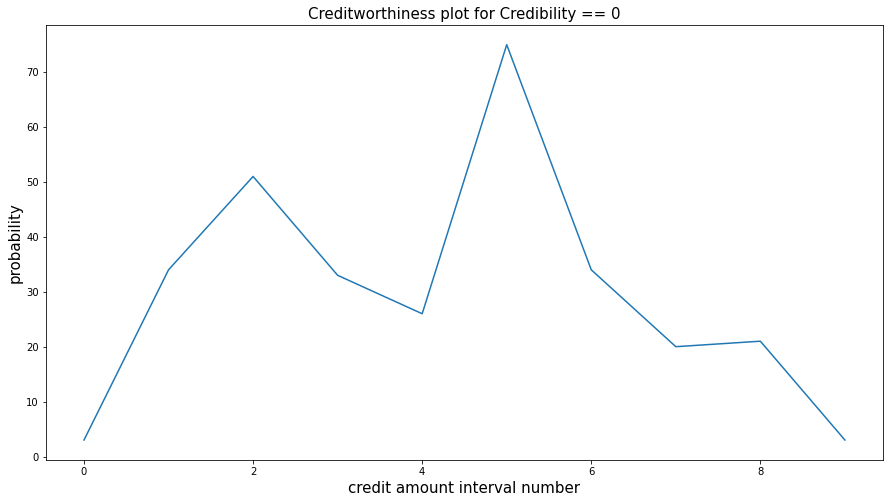

In [18]:
plt.plot(CreditWorthiness_df.Credibiliity0)
plt.xlabel('credit amount interval number',fontsize = 15)
plt.ylabel('probability',fontsize = 15)
plt.title("Creditworthiness plot for Credibility == 0",fontsize = 15)
plt.show()

In [19]:
# distribution for defaulter picks at credit amount interval 5.

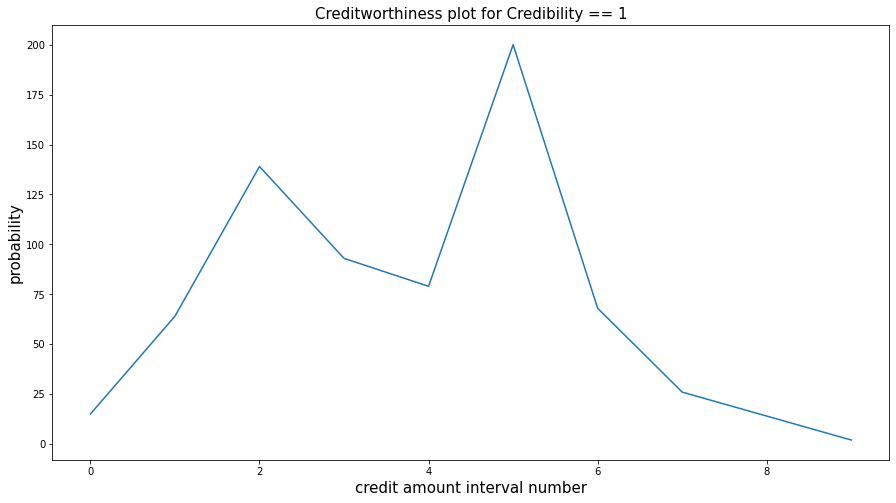

In [20]:
plt.plot(CreditWorthiness_df['Credibiliity1'])
plt.xlabel('credit amount interval number',fontsize = 15)
plt.ylabel('probability',fontsize = 15)
plt.title("Creditworthiness plot for Credibility == 1",fontsize = 15)
plt.show()

In [21]:
# distribution for non defaulter picks at credit amount interval 5.

# 6. Prepare input data for the model

In [22]:
X = df['CreditAmount']
y = df.Creditability.astype('category')

In [23]:
# Creditability has been chossen as dependent variable and CreditAmount has been choosen as independent variable.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.3)
# dataset has been split in 70:30 ratio.

# 7. Fit logistic regression model

In [25]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()
# fitting logistic regression model.

Optimization terminated successfully.
         Current function value: 0.606103
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: Creditability    AIC:              852.5440  
Date:               2022-08-15 21:42 BIC:              861.6462  
No. Observations:   700              Log-Likelihood:   -424.27   
Df Model:           1                LL-Null:          -434.17   
Df Residuals:       698              LLR p-value:      8.6412e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          1.2012    0.1260   9.5359  0.0000   0.9543   1.4480
CreditAmount  -0.0001    0.0000  -4.4192  0.0000  -0.0002  -0.0001
=================================================================

"""

In [26]:
# pseudo r-square is very low 0.023. So the model can be improved.

# 8. Test accuracy calculation

In [27]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,"predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

X_test[0:5]

249    5248
353    3499
537    1455
424    1829
564    4272
Name: CreditAmount, dtype: int64

In [28]:
# created a function for prediction y.

In [29]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['original_Creditability'] = np.array(y_test)
y_pred_df[0:10]

,actual,predicted_prob,original_Creditability
249,5248,0.645581,1
353,3499,0.690002,0
537,1455,0.737768,1
424,1829,0.729391,1
564,4272,0.670740,1
124,1213,0.743099,1
492,3104,0.699602,1
553,894,0.750016,1
982,5096,0.649557,0
935,2235,0.720109,0


In [30]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]
# finding the predicted value of creditability

,actual,predicted_prob,original_Creditability,predicted
249,5248,0.645581,1,1
353,3499,0.690002,0,1
537,1455,0.737768,1,1
424,1829,0.729391,1,1
564,4272,0.670740,1,1
124,1213,0.743099,1,1
492,3104,0.699602,1,1
553,894,0.750016,1,1
982,5096,0.649557,0,1
935,2235,0.720109,0,1


In [31]:
print('Total Accuracy : ',np.round(accuracy_score( y_test, y_pred_df.predicted ), 5 ) )

Total Accuracy :  0.71667


In [32]:
# overall accuracy if 71.667% which is high but not good, so the model can be improved.

# 9. Build a confusion matrix

In [33]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "Not Default"] , 
                                                                yticklabels = ["Default", "Not Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

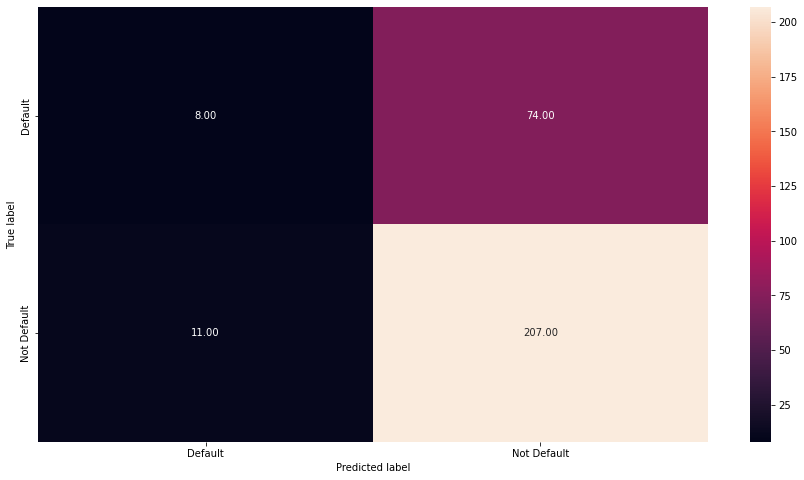

In [34]:
draw_cm(y_pred_df.original_Creditability, y_pred_df.predicted )

In [35]:
# there are lot of wrong predictions has happend.

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

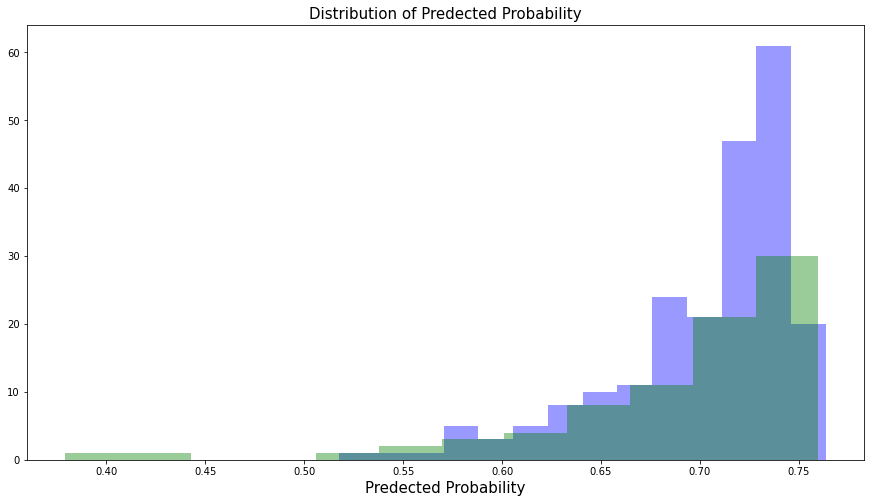

In [36]:

sns.distplot( y_pred_df[y_pred_df.original_Creditability == 1]["predicted_prob"], kde=False, color = 'b' ) # not default.
sns.distplot( y_pred_df[y_pred_df.original_Creditability == 0]["predicted_prob"], kde=False, color = 'g' ) # default.

plt.title("Distribution of Predected Probability",fontsize = 15)
plt.xlabel("Predected Probability",fontsize = 15)
plt.show()

In [37]:
# both the defaulter and not defaulter distribution is havily left skewed.